<a href="https://colab.research.google.com/github/tsvoronos/API202-students/blob/main/API_203MA_Sec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# API-203MA Review Session #2
**Friday, March 10**

TF: Matthew Dodier

# Table of Contents
1. [Lecture Recap](#Lecture-Recap)
2. [Exercises](#Exercises)

# Lecture Recap

## Quasi-Experimental Design

* Quasi-experimental or non-experimental methods attempt to identify causal effects when randomization is not feasible. We will explore several quasiexperimental methods in the coming weeks. For each of them, we must consider:

1. **Internal Validity (Quality):** how close does this method get us to approximating the true counterfactual?

  a) What assumptions are required for this approximation to be valid?

  b) What alternative explanations for the "effects" that we observe still remain?

2. **External validity (Relevance):** How is the external validity of our results affected by this method?

  a) Are we only making inferences about a subset of the observations in our data?
  
  b) What assumptions are required to be able to generalize further?

## Instrumental Variables

1. Theory and Assumptions
2. Making IV Work: 2SLS
3. Key Takeaways

### Theory and Assumptions

#### Instrumental variables and OVB
* Consider this "short" regression to estimate impact of treatment $X_1$ :
$$
Y=\beta_0+\beta_1 X_1+u
$$
* Coefficient $\beta_1$ may be biased due to omitting another factor $X_2$ :
$$
Y=\beta_0+\beta_1 X_1+\beta_2 X_2+v
$$
  * Another way to think about this: in short regression, error term u partly consists of omitted variable $X_2$ $\rightarrow$ OVB in the short regression

* Instrumental variables (IV) regression breaks $X_1$ into two parts:
  * A part correlated with $\mathrm{u}$
  * A part not correlated with $u \rightarrow$ The part of $X_1$ uncorrelated with $u$ gives an unbiased estimate of $\beta_1$.

* Instrumental Variables (IV) are useful when:
1. We do not have an RCT but nature or public policy has caused two similar groups of individuals to be treated differently
2. We have compliance issues in an RCT

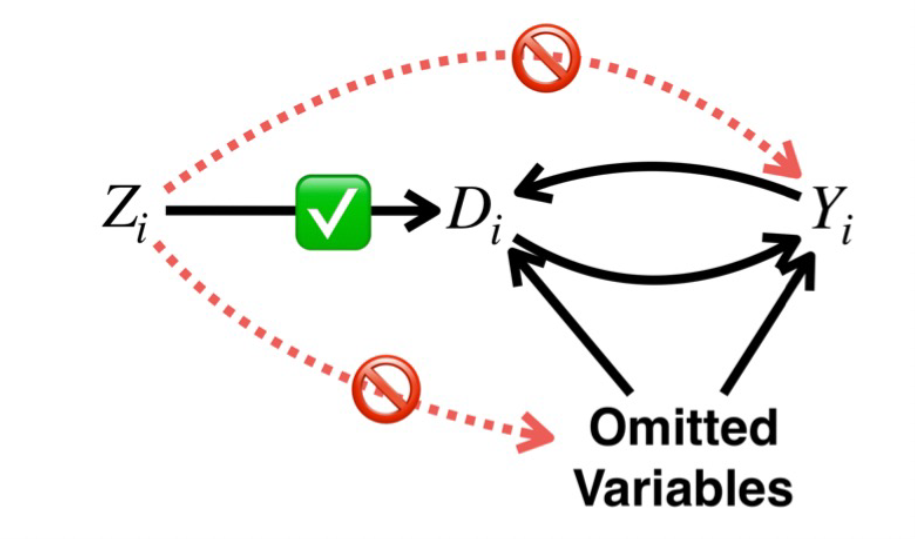

#### Instrumental variables: terminology

* *Endogenous variable $(D_i)$:* Explanatory variable that is subject to the problem of reverse causation with the dependent variable and/or omitted variable bias.
  * Formally: An independent variable that is correlated with the error term of a PRF

* *Exogenous variable:* Explanatory variable whose values are not determined by any variables related to the causal relationship of interest.
  * Formally: An independent variable that is not correlated with the error term of a PRF

  * *Instrumental variable $(Zi)$:* Exogenous variable (called our "instrument") that affects the dependent variable of interest only through the endogenous variable of interest.

* **We can use instrumental variables to isolate the causal effect of $D_i$ on $Y_i$ by leveraging exogenous variation induced by $Z_i$.**

#### IV Assumptions

* The instrument must therefore satisfy two conditions:
1. Instrument relevance (a.k.a. First Stage): Our instrument must affect the endogenous variable.
$\rightarrow$ the stronger the relationship, and the larger its magnitude, the better.
2. Instrument exogeneity (a.k.a. Exclusion Restriction): Our instrument affects the dependent variable only through the endogenous variable.
$\rightarrow$ No arrow going from the instrumental variable to the outcome except through the treatment variable.

#### IV Examples

* Using mortality rates of colonialists to estimate the effect of colonization policies on post-independence economies (Acemoglu et al. 2000)
* Using river gradients to estimate the effect of irrigation dams on agricultural productivity and poverty in India (Duflo and Pande 2007)
* Using prison overcrowding legislation to estimate the effect of prison population size on crime rates (Levitt 1995)
* Using random judge assignment to estimate the effect of incarceration on education and recidivism (Aizer and Doyle 2015)
* Using lottery draft to estimate the effect of military service on earnings (Angrist, 1990)

#### Example: the effects of institutional quality

* Does institutional quality affect GDP per capita?
  * Question explored by Daron Acemoglu, Simon Johnson and James Robinson in their article "The Colonial Origins of Comparative Development"

* Interested in establishing whether there is a causal impact of institutional quality on development across countries
  * Focus on property rights as measure of institutional quality
  * Focus on 64 countries that were colonized at some historical point by European settlers
  * Devastating effects of colonization in many countries through different channels; the authors want to causally investigate whether institutional quality is one of those channels

* Authors focus on the absence of expropriation risk as the measure of institutional quality
  * Higher values of Expropriation Risk indicate lower risk

* The key regression of interest was:
$$
\log\_y=\beta_0+\beta_1 \text { ExpropRisk }+u
$$

* Country-level data:
  * `log_y`: the log of GDP per capita in 1995 (PPP)
  * `ExpropRisk`: the average protect against expropriation risk between 1985 and 1995

##### Here is the bivariate regression (OLS) from their paper:

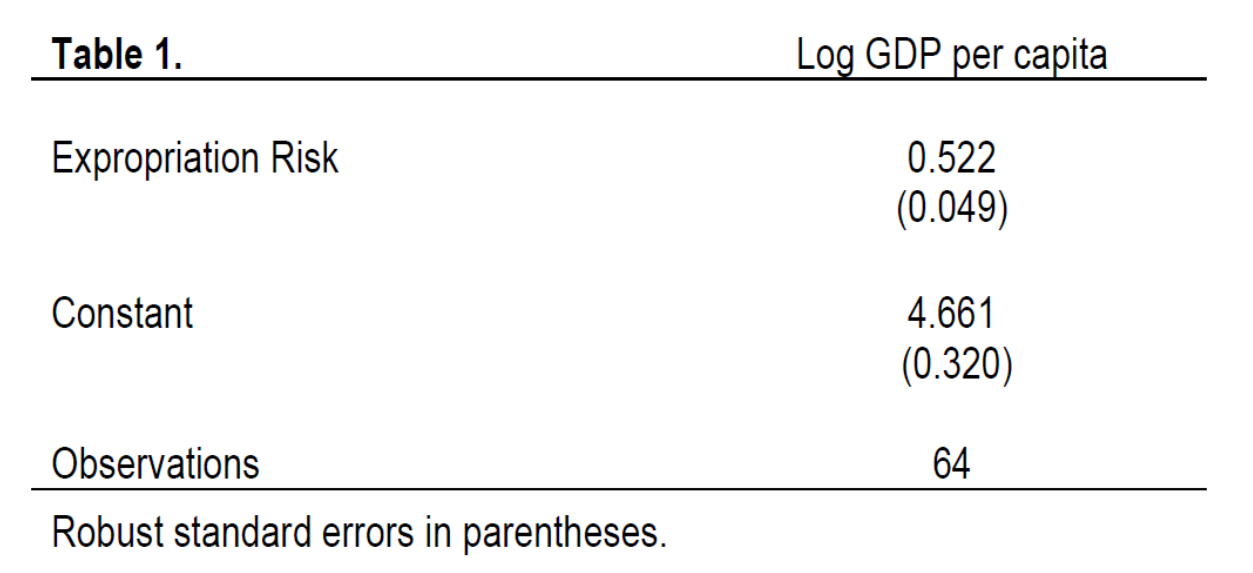

* Interpret the coefficient on expropriation risk.


* Do you think the OLS regression suffer from omitted variable bias?


* In your view, what are the most important factors we would need to control for?

Due to concern about bias and the difficulty of knowing what all the factors one would need to control for are the authors use an instrumental variables strategy. 
  * settler mortality among first European settlers
    * Continuous variable log_settlermort
    * Measures the log of the settler mortality rate per 1,000

* The authors claim that this instrument is valid based on the following sequence of arguments
1. Different types of colonization strategies $\rightarrow$ different types of early institutions: 'productive' versus 'extractive'
2. Colonization strategy was influenced by feasibility of settlements, in turn influenced by disease environment
3. Early institutions persist even after independence

* To get more intuition for the instrument, the authors describe the main sources of settler mortality
  * Malaria and yellow fewer were the major sources
    * Methods to deal with diseases only developed later

Is the instrumental variable valid?

### Making IV Work: 2SLS

#### Making IV work: Two Stage Least Square (2SLS)

* We will now discuss the process through which we can estimate the causal effect of $D$ on $Y$ using the instrument $Z$. This process is called **Two-Stage Least Squares** because it involves estimating the two different equations
1. **First stage:** the endogenous regressor $X$ is regressed on the instrument $$
\text { ExpropRisk }=\beta_0+\beta_1 \log \_ \text {settlermort }+\varepsilon
$$

* Tests that the instrument is ___
* In other words, does the instrument provide a source of variation in the treatment? Does settler mortality change expropriation risk?

2. **Second Stage (IV estimate):** the outcome $Y$ is regressed on treatment $D$ instrumented by $Z(\widehat{D})$. In our example:
$$
\log\_y=\beta_0+\beta_1 \text { ExpropRisk }+\varepsilon
$$

* If the requirements of the instrument are satisfied, the estimated coefficient $\widehat{\beta_{I V}}$ is the estimator for the causal estimate of $D$ on $Y$.

* The papers with IV estimate usually include also:

**Reduced form:** the outcome $Y$ is regressed directly on the instrument $Z$. In our example:
$$
\log\_y=\beta_0+\beta_1 \log _{-} \text {settlermort }+\varepsilon
$$
  * In other words, does the instrument affect the outcome of interest? Does settler mortality affect GDP?

#### Example: the Effects of Institutional Quality

Here are the main results from the paper:


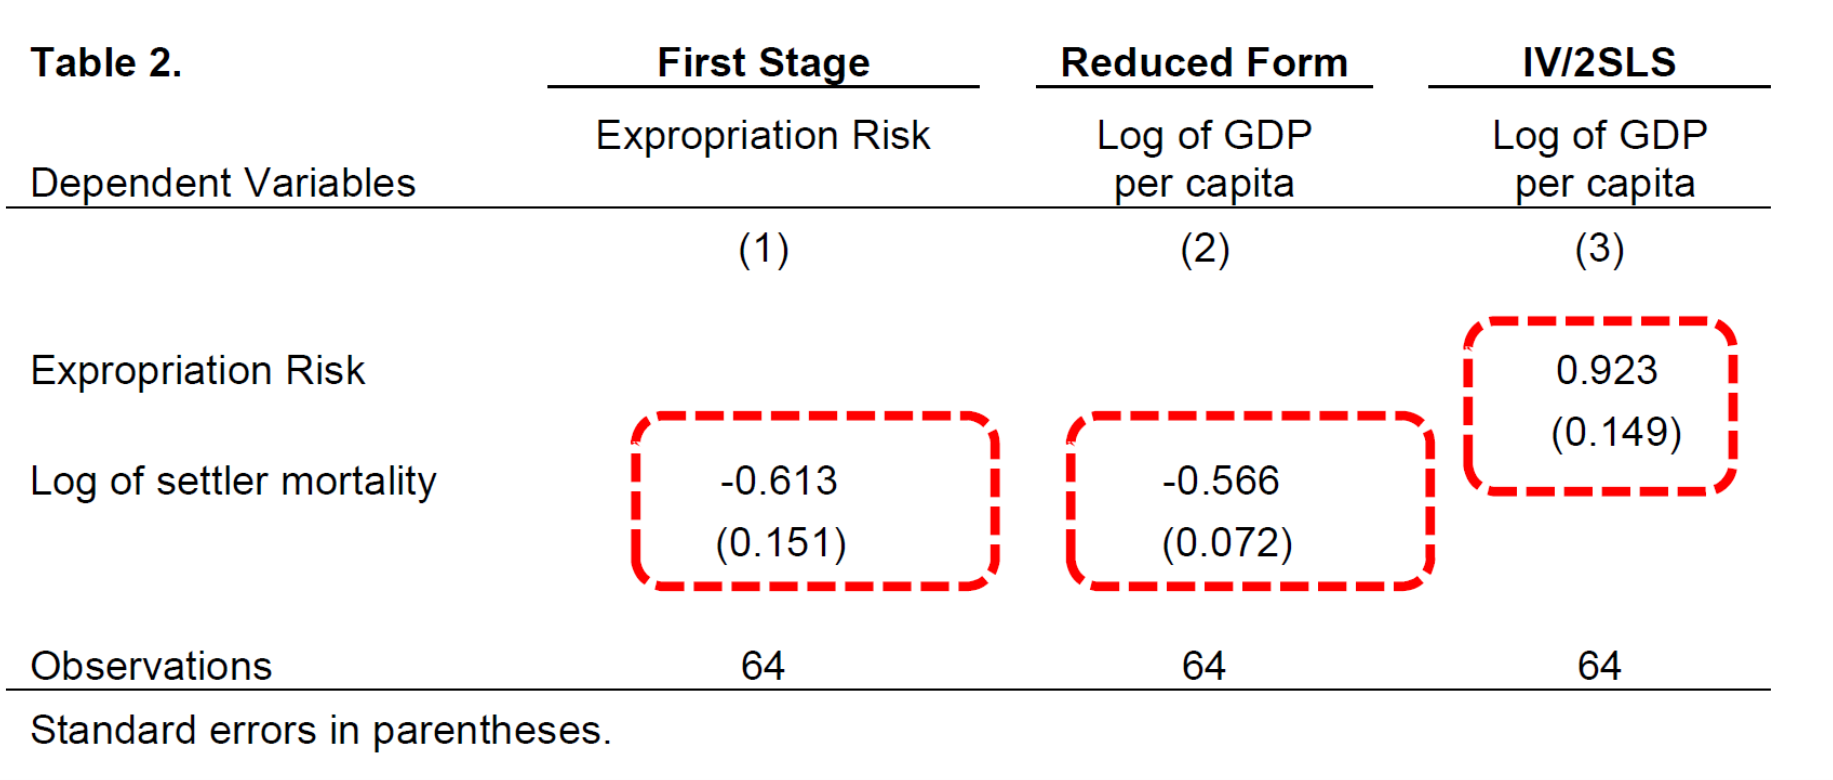

* Interpret the first stage coefficient on log settler mortality rate. Is the instrument relevant?


* Interpret the "Reduced Form" coefficient on log settler mortality.


* Interpret the IV (2SLS) coefficient on expropriation risk.



##### First Stage, IV, and Reduced Form

* Do you notice a relationship between the three coefficients?
  * The IV estimate is the ratio of the __ to the ___ .

* Is the IV estimate causal? Is the instrument exogenous? Is there another channel through which settler mortality affected GDP per capita?


###### Which of the following is not true of an instrumental variable model?
1. You can include controls
2. You can test for relevance of the instruments
3. You can test for exogeneity of the instrument
4. Both relevance and exogeneity have to be satisfied in order for the instrument to be valid
5. None of the above

**Answer:**

### IV Takeaways

* Instrumental variables allow us to address issues of omitted variable bias by leveraging an **exogenous variable** to isolate the impact of an endogenous variable on the outcome.
  * In order to accomplish this, instruments must be correlated with the endogenous variable, and only affect the outcome via the endogenous variable.
* Thinking about external validity:
  * Estimates generated from instrumental variables are based on the individuals whose behavior is affected by the instrument.
  * IV estimates are **local average treatment effects (or LATEs)** because they are average effects for a subset (i.e. local part) of the population.
* Finding an instrument is hard! Many fail the exogeneity condition.

## IV and RCT noncompliance

Overview: 
1. Compliance Issues in RCT
2. IV in Action
3. Better Late Than Nothing
4. Key Takeaways

### Compliance Issue in RCT

In 2008, Oregon expanded Medicaid to 10,000 individuals. Who could apply was determined by lottery. Amy Finkelstein and coauthors estimated the impact of having health insurance on outcomes such as health and financial strain.

Out of 100 lottery winner, how many do you expect enrolled in Medicaid?



### Reduced Form Estimates

* As we saw discussing RCTs, one potential strategy is to measure the INTENTION TO TREAT (ITT) effect. In this scenario, we do not pay attention to who received the treatment and who did not; we only pay attention to who was intended to receive the treatment and who was not.
Financial_strain $=\widehat{\beta_0}+\widehat{\beta_1}$ Lottery $+\hat{u}$
* $\widehat{\beta_1}$ is the causal impact of winning the lottery (i.e. being offered the insurance) on the health outcome
  * Average difference in health outcomes between individuals assigned to the TREATMENT compared to individuals assigned to the CONTROL GROUP
* Advantage: This preserves randomization, and thererfore gives an unbiased estimate of treatment assignment
* Disadvantage: We only have an estimate of the effect of being assigned the treatment, not the treatment itself

### IV Estimates
* But what if we care about the effect of getting Medicaid insurance?
* One of the most useful applications of instrumental variables is in estimating the impact of a randomized trial when there was non-compliance.
* We can use instrumental variables to conceptualize this:

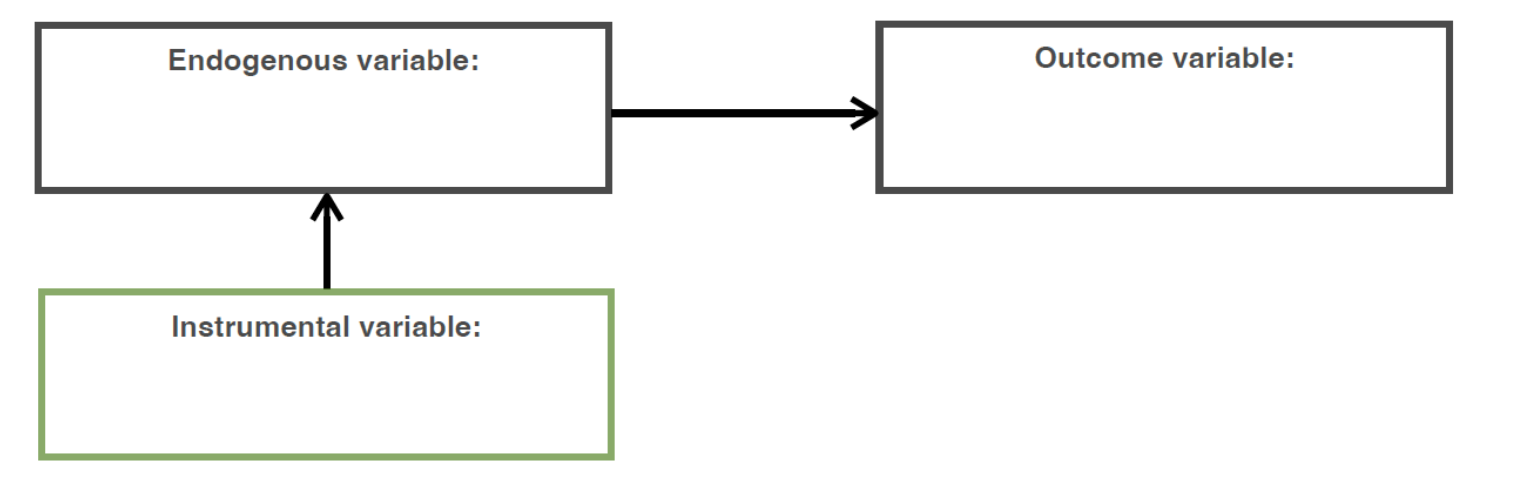

### Instrumental variables in action

Write the equations for the:
* First Stage estimates
$$
\text { Medicaid }=\widehat{\alpha_0}+\widehat{\alpha_1} \text { Lottery }+\hat{\eta}
$$
* Reduced Form estimates
$$
\text { Financial_strain }=\widehat{\beta_0}+\widehat{\beta_1} \text { Lottery }+\hat{u}
$$
* IV estimates
$$
\text { Financial_strain }=\widehat{\gamma_0}+\widehat{\gamma_1} \widehat{\text { Medicaid }}+\hat{v}
$$

Where $\widehat{\text {Medicaid}}$ is the fitted values from the first stage regression

#### First stage estimates:

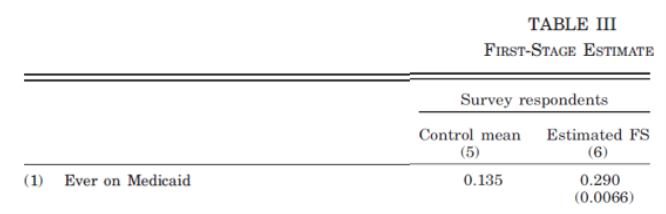

* Winning the lottery increased Medicaid enrollment by 
  * ___ $\%$ of lottery losers enrolled in Medicaid. 
  * ___ $\%$ of lottery winners enrolled in Medicaid.
* Is the instrument relevant?


##### Assumptions:
* Does this instrumental variable satisfy the requirements of a valid of instrument?

  1. Relevance

  
  2. Exogeneity


#### Reduced form estimates:

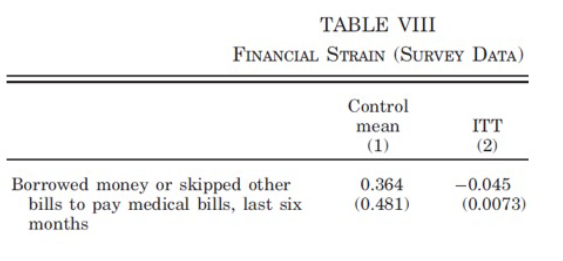

* Why is this called intent-to-treat?

* Winning the lottery decreases bill-skipping by ___
* ___ $\%$ of lottery losers skipped bills.
* ___ $\%$ of lottery winners skipped bills.
* Does winning the lottery affect financial strain?

#### IV (LATE) estimates:


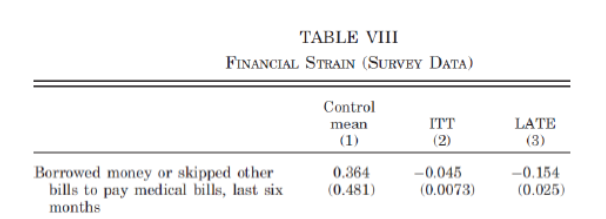

Does having health insurance affect financial strain? By how much?

#### Instrumental variables in action
* How does it relate to the first stage and reduced form results?
$$
\widehat{\beta_{I V}}=\widehat{\beta_{\text {Wald }}}=\frac{\widehat{\beta}_{R F}}{\widehat{\beta}_{F S}}
$$

* Binary instruments lead to the Wald Estimator. Intuitively:
$$
\frac{\text { effect of instrument on outcome }}{\text { effect of instrument on treatment }}
$$


In our example:
$$
\widehat{\beta_{\text {Wald }}}=\frac{(\text {Average Financial Strain for Lottery Winner }- \text { Average Financial Strain for Lottery Loser})}{\text { (Proportion Insured for Lottery Winner }- \text { Proportion Insured for Lottery Loser})}
$$

### Better LATE than nothing

* The people who accepted the Medicaid offer may have been different than those who didn't.
* In other words, takeup isn't random.
* Are you concerned that imperfect compliance may be reducing the internal validity of our estimates?

* Randomization guarantees the two groups have similar numbers of:

  * **Never-takers** - People who won't get insurance regardless of whether they win the lottery.

  * **Compliers** - People who get insurance only because they win the lottery.

  * **Always-takers** - People who will get insurance regardless of whether they win the lottery.



* Who are we making inferences about with IV estimates? Let's start by categorizing individuals in this scenario based on how they would behave if they were selected in the lottery or not:

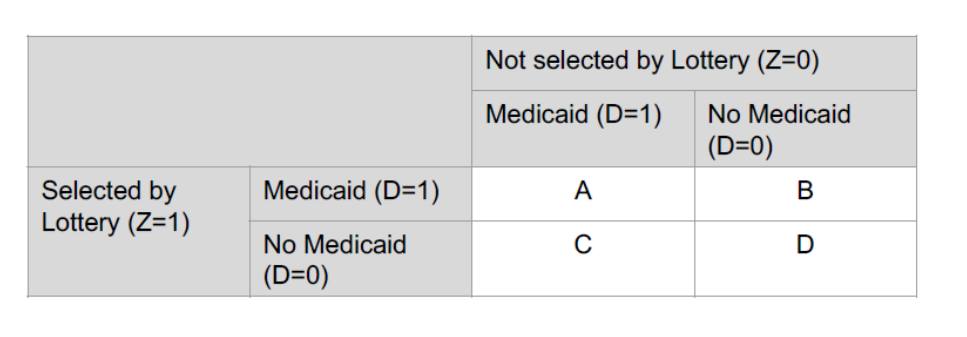

#### Where does the IV estimate of the impact of insurance on bill-skipping come from? Who are we making influence on?

  a. Group A

  b. Group B

  c. Group C

  d. Group D

Hint: By construction, a regression using an instrumental variable only uses variation in the endogenous variable that is induced by the instrument.

**Answer:**

#### Internal and External Validity

* In the context of program evaluation with heterogeneous effects, our IV estimator quantifies the causal effect of the program on the outcome **for compliers**.
  * In words, **LATE** means that our estimated effect applies only to individuals who would not have received the treatment had it not been for the instrumental variable.
* Is our IV estimate highly, somewhat, or not **internally valid**?
* How **externally valid** is our IV estimate for that policy?

#### ITT vs. LATE
* What is the conceptual difference between the LATE and ITT in this specific example?

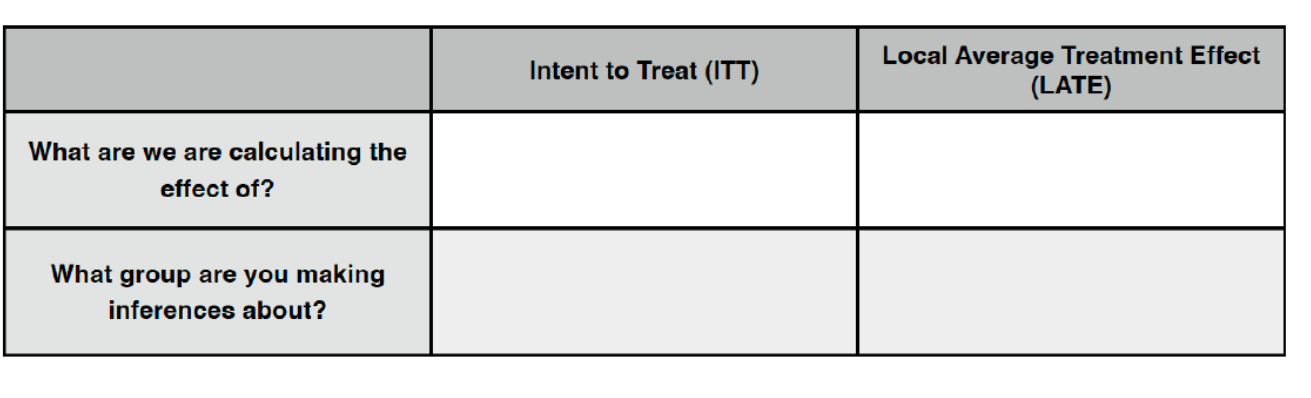

#### Other RCTs Encouragement Design
* In these designs, randomization is treated as an instrument from the start. It is not expected that being randomized into a group will guarantee receipt of treatment, only that it will increase the **probability of receiving treatment.**
* Some examples of randomized encouragement designs in the literature:
  * Effect of interest-free loans for improved plumbing on quality of life in Morocco (Devoto et al. 2012)
* Some caveats:
  * While the **exclusion restriction** may be easier to meet due to a randomized offer, the **relevance** condition (first stage) might be difficult to meet depending on uptake of the intervention.
  * Your effect is limited to the LATE: the population of people that would not have received the program had it not been for the offer.

### IV and RCT non-compliance Takeaways

* Instrumental variable techniques can be quite helpful in the context of randomized experiments with imperfect compliance.
* Such estimates then represent local average treatment effects (LATE).
* These are the impact of the treatment on compliers, the subset of people whose treatment status was changed by the experiment.
* Such estimates are internally valid for those people.
* Whether such estimates are externally valid for the wider population depends on the extent to which compliers resemble that wider population.

# Exercises

The Effects of Economic Shocks on Civil Conflicts
* What is the impact of economic conditions on the likelihood of civil conflict?
* Question explored by Edward Miguel, Shanker Satyanath, and Ernest Sergenti

* The key regression of interest was:
$$
any\_prio=\beta_0+\beta_1 g d p\_g+u
$$

Country-level data:
* `any_prio`: civil conflict indicator where all country-year observations with a civil conflict in progress with at least 25 battle deaths per year (or 1,000 battle deaths in some specifications) are coded as ones, and other observations are coded as zeros
* `gdp_g`: the annual growth rate of per capita income
* `GPCP_g`: annual rainfall

1. First Stage
$$
g d p\_g=\beta_0+\beta_1 G P C P\_g+u
$$

2. Reduced Form
$$
any\_prio=\beta_0+\beta_1 G P C P+u
$$

3. IV Regression
$$
any\_prio=\beta_0+\beta_1 g d p g+u
$$

In [ ]:
#suppress warnings
options(warn =-1,dplyr.summarise.inform=FALSE)

library(tidyverse)

# installing and loading fixest package
check_installed <- require(fixest)
if(check_installed==F){
  install.packages("fixest")
  require(fixest)
}

# loading data
mss <- read.csv("https://raw.githubusercontent.com/tsvoronos/API202-students/main/data/mss.csv")

**1. Let's run a bivariate regression (OLS) of civil conflict on economic growth rate.  Do you think this regression suffers from omitted variable bias?  In your view, what are the most important factors we would need to control for?**

In [ ]:
# Your code here:

#### Your answer here:

**2. The authors use `GPCP` as an instrument in this paper.  Do you think this instrument is likely to be relevant?  Do you think this instrument is likely to be exogenous?**

#### Your answer here:

**3. Run the first stage regression.  Intrepret the first stage coefficient.  Is the instrument relevant?**

In [ ]:
# Your code here:

#### Your answer here:

**4. What is the reduced form regression in this paper?  Run this regression and interpret the reduced form coefficient.**

In [ ]:
# Your code here:

#### Your answer here:

**5. Run the second stage regression and interpret the IV (2SLS) coefficient on GDP growth.**



In [ ]:
# Your code here:

#### Your answer here: